In [ ]:
# Modelación del aprendizaje con inteligencia artificial (Gpo 101)
# Equipo 2
# Sebastián Miramontes Soto A01285296
# Raul Correa Ocañas A01722401
# Ericka Sofía Rodriguez Sanchez A01571463

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
dataset = pd.read_csv('Data.csv')
dataset.shape

(660, 15)

In [ ]:
dataset.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [ ]:
dataset.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


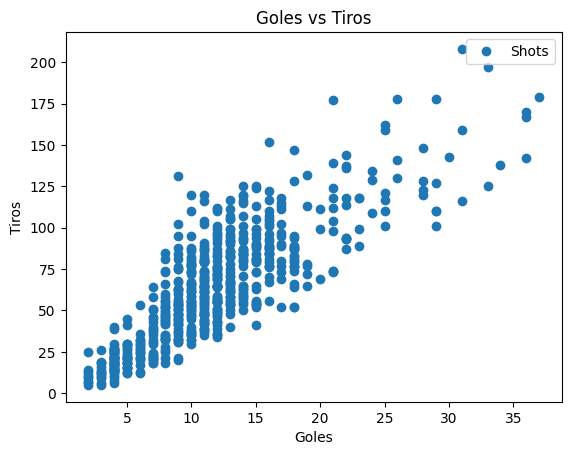

In [ ]:
dataset.plot(x='Goals', y='Shots', style='o')
plt.title('Goles vs Tiros')
plt.xlabel('Goles')
plt.ylabel('Tiros')
plt.show()

<ipython-input-47-83d2f75e7b64>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seabornInstance.distplot(dataset['Shots'])


<Axes: xlabel='Shots', ylabel='Density'>

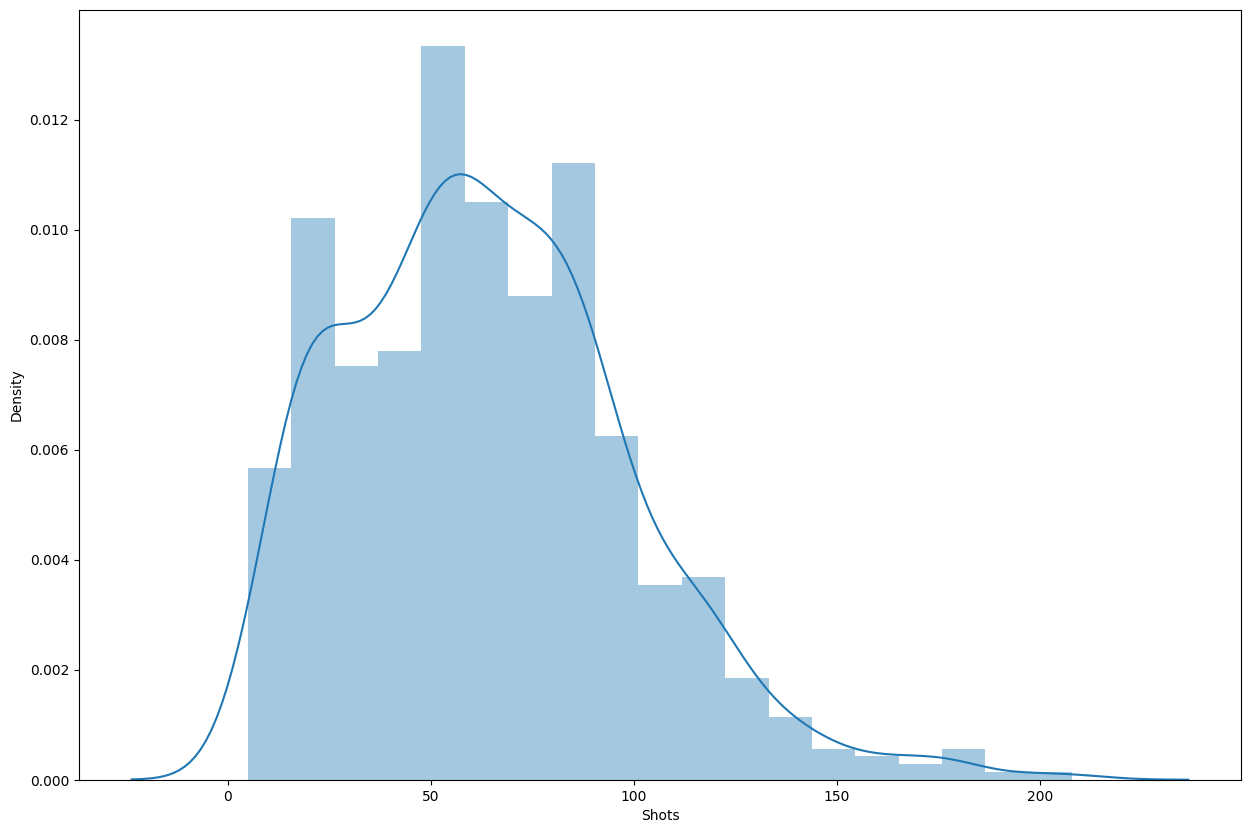

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Shots'])

In [ ]:
X = dataset['Goals'].values.reshape(-1,1)
y = dataset['Shots'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("intercept: ", regressor.intercept_)
print("slope (Coefficient): ", regressor.coef_)

intercept:  [6.62098554]
slope (Coefficient):  [[4.90999674]]


In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,18,31.170969
1,77,85.180933
2,55,80.270937
3,5,21.350976
4,66,55.720953
...,...,...
127,96,65.540946
128,72,99.910924
129,87,75.360940
130,44,45.900959


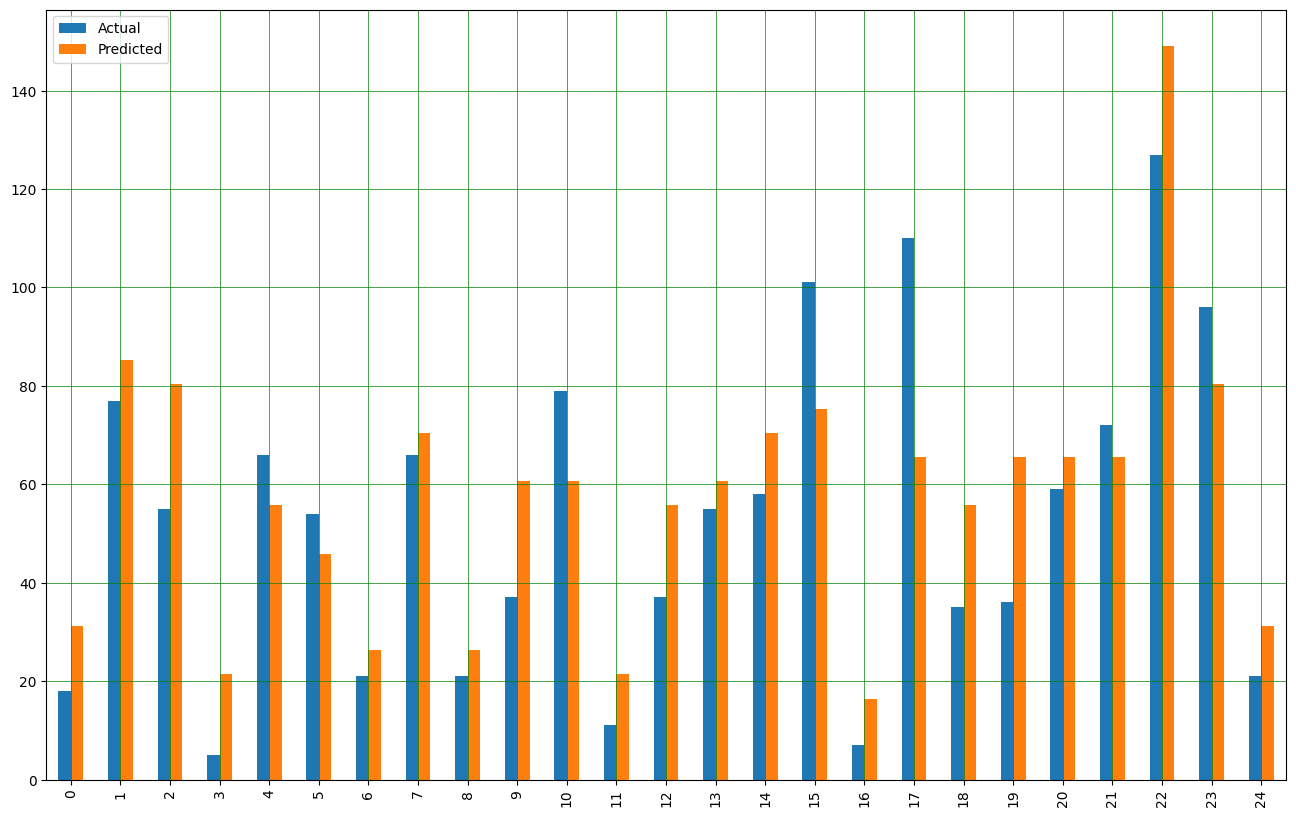

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

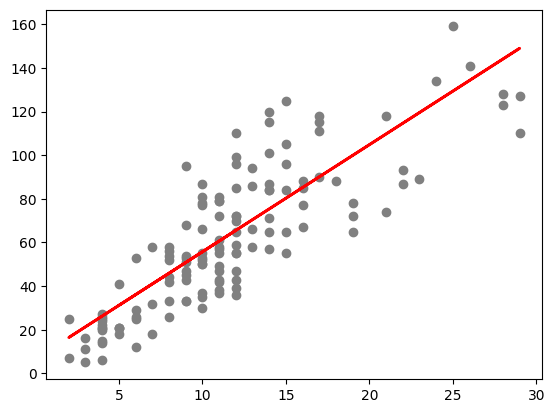

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14.845520158384549
Mean Squared Error: 335.9431770561631
Root Mean Squared Error: 18.328752741421418


*Reflexión:*
*En este tutorial pudimos observar cómo hacer un análisis de una regresión lineal al tener dos variables que parecerían relacionadas entre sí, para así lograr una predicción y observar qué tan cercana es a la realidad. En nuestro caso, elegimos los goles como la variable "X" y los tiros como variable "Y", ya que pensábamos que definitivamente existe una relación obvia entre los tiros necesarios para que un delantero pueda anotar gol en un partido. En nuestro caso específico, tuvimos un par de casos donde la predicción fue bastante cercana a la realidad, pero desafortunadamente en algunos de los casos existió mucha diferencia entre la predicción y los tiros que en realidad se hicieron, por lo que tuvimos un error absoluto medio bastante más alto que el que se mostraba. Pensamos que esto podría deberse a que en este deporte siempre existe la posibilidad de una falla en una ocasión manifiesta de gol, o la atajada del portero, las cuales pueden ser situaciones fuera de nuestro análisis realizado para esta entrega. Esta actividad nos ayudó a recordar ciertos aspectos vistos en semestres anteriores de la estadística como lo son el error medio cuadrado, el error medio absoluto, mapas de dispersión, la media aritmética, entre otros. Esto nos permitió reforzar los conocimientos y crear nuevos de manera experimental.*